# MESC analysis

In [1]:
setwd("~/project-gandalm/isoform_twas/MESC/")
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
all.gene <- read.table("out/all.gene.SCZ.Clozuk.2018.all.h2med", header = T, stringsAsFactors = F)

In [5]:
all.gene

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.01313009,0.00435822,0.03161524,0.0104617
h2nonmed,0.40217875,0.01551244,0.96838476,0.0104617
h2,0.41530883,0.01528402,1.00000000,0.0000000


In [6]:
all.iso <- read.table("out/all.iso.SCZ.Clozuk.2018.all.h2med", header = T, stringsAsFactors = F)

In [7]:
all.iso

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.02631269,0.007716729,0.06295599,0.01829824
h2nonmed,0.39164106,0.016179024,0.93704401,0.01829824
h2,0.41795375,0.015321560,1.00000000,0.00000000


In [8]:
egene <- read.table("out/gene.SCZ.Clozuk.2018.all.h2med", header = T, stringsAsFactors = F)

In [9]:
egene

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.01153767,0.004322936,0.02782777,0.01040629
h2nonmed,0.40307210,0.015548662,0.97217223,0.01040629
h2,0.41460977,0.015272720,1.00000000,0.00000000


In [16]:
df <- rbind(all.gene, all.iso, egene)
df$Category <- c(rep("All-gene", 3), rep("All-isoform", 3), rep("eGene", 3))
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
h2med,0.01313009,0.004358220,0.03161524,0.01046170,All-gene
h2nonmed,0.40217875,0.015512435,0.96838476,0.01046170,All-gene
h2,0.41530883,0.015284015,1.00000000,0.00000000,All-gene
h2med,0.02631269,0.007716729,0.06295599,0.01829824,All-isoform
h2nonmed,0.39164106,0.016179024,0.93704401,0.01829824,All-isoform
h2,0.41795375,0.015321560,1.00000000,0.00000000,All-isoform
h2med,0.01153767,0.004322936,0.02782777,0.01040629,eGene
h2nonmed,0.40307210,0.015548662,0.97217223,0.01040629,eGene
h2,0.41460977,0.015272720,1.00000000,0.00000000,eGene


In [17]:
df <- df %>% filter(Quantity == "h2med")

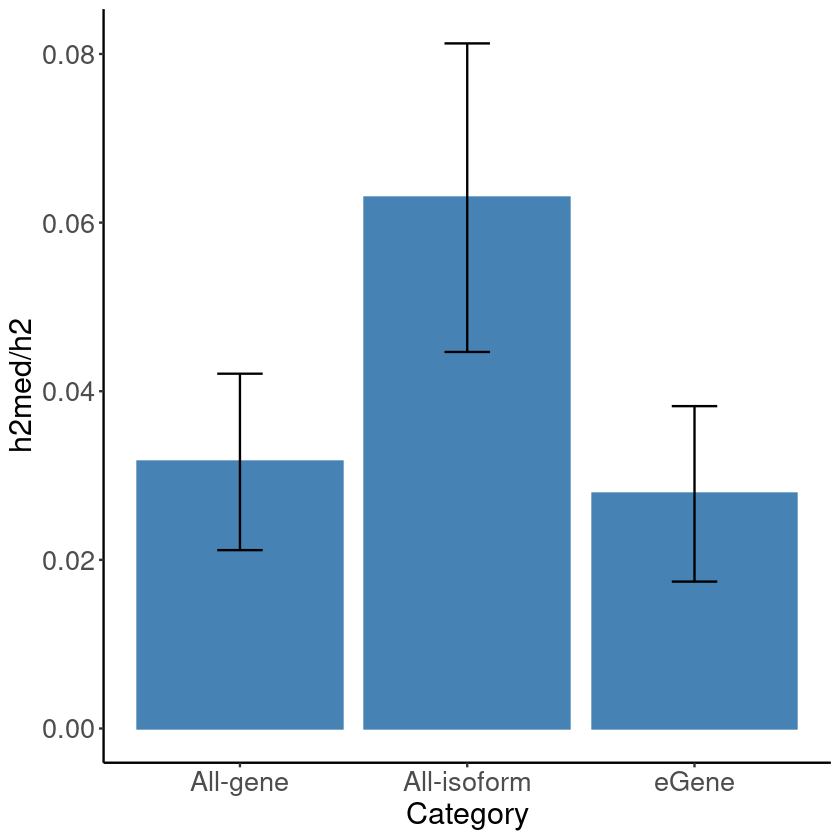

In [18]:
p <- ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", fill = "steelblue", color = "steelblue") +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width=.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18)) 
p

In [20]:
ggsave("figures/mesc.png", p, height = 6, width = 6)